### Tris

In [15]:
import random
import time

In [2]:
def tri_a_bulles(tableau):
    taille = len(tableau)
    for i in range(taille):
        for j in range(taille-1):
            if tableau[j] > tableau[j+1]:
                tableau[j], tableau[j + 1] = tableau[j+1], tableau[j]
    return tableau

In [3]:
def tri_par_insertion(tableau):
    for i in range(len(tableau)):
        x = tableau[i]
        j = i
        while j>0 and tableau[j-1]>x:
            tableau[j] = tableau[j-1]
            j-=1
        tableau[j] = x
    return tableau

In [4]:
def tri_rapide_old(tableau):
    taille = len(tableau)
    tableau_tri = []
    while len(tableau)>0:
        minimum = tableau[0]
        indice = 0
        for i in range(1,len(tableau)):
            if tableau[i]<minimum:
                minimum = tableau[i]
                indice = i
        tableau_tri.append(minimum)
        tableau.pop(indice)
    return tableau_tri

In [24]:
def echanger(tableau, i ,j):
    tmp = tableau[i]
    tableau[i]=tableau[j]
    tableau[j] = tmp

def partitionner(tableau, debut, fin, pivot):
    i = debut
    j = fin -1
    v = tableau[pivot]
    echanger(tableau, fin, pivot)
    
    while i < j:
        while i<j and tableau[i] <= v:
            i+=1
        while i<j and tableau[j] > v:
            j-=1
        echanger(tableau,i,j)
    if tableau[i] > tableau[fin]:
        echanger(tableau, i,fin)
    return i
    
def partitionner_2(tableau, debut, fin, pivot):
    j = debut
    echanger(tableau, fin, pivot)
    for i in range(debut, fin):
        if tableau[i]<=tableau[fin]:
            echanger(tableau,i,fin)
            j += 1
    echanger(tableau, j,fin)
    return j    
    
def tri_rapide(tableau, debut, fin):
    if debut < fin:
        pivot = (debut + fin)//2
        # pivot = partitionner_2(tableau, debut, fin, pivot)
        pivot = partitionner(tableau, debut, fin, pivot)
        tri_rapide(tableau,debut, pivot -1)
        tri_rapide(tableau, pivot+1,fin)

In [6]:
def fusion(T1, T2):
    if len(T1)==0:
        return T2
    if len(T2)==0:
        return T1
    if T1[0] <= T2[0]:
        return [T1[0]] +fusion(T1[1:],T2)
    else:
        return [T2[0]]+ fusion(T1, T2[1:])

def tri_fusion(T):
    if len(T)<=1:
        return T
    else:
        indice = int(len(T)/2)
        return fusion(tri_fusion(T[:indice]),tri_fusion(T[indice:]))

In [25]:
random.seed(time.time())
tableau_1 = []
N= 10000
for i in range(N):
    tableau_1.append(random.randint(0, N))
    
for i in range(10):
    print(tableau_1[i],end=' ')
print('')
# print(tableau_1)
start = time.time()
tri_rapide(tableau_1,0,len(tableau_1)-1)
end = time.time()
duree = end-start
# print(tableau_1)
for i in range(10):
    print(tableau_1[i],end=' ')
print(' ... ',end ='')
for i in range(10):
    print(tableau_1[len(tableau_1)-10+i],end=' ')
print('')

print("tri_rapide",duree, "secondes")    
tableau_1.clear()




for i in range(N):
    tableau_1.append(random.randint(0, N))
    
    
# print(tableau_1)
start = time.time()
tableau_1 = tri_a_bulles(tableau_1)
end = time.time()
duree = end-start
# print(tableau_1)

print("tri_a_bulles",duree, "secondes") 


tableau_1.clear()
for i in range(N):
    tableau_1.append(random.randint(0, N))
    
    
# print(tableau_1)
start = time.time()
tableau_1 = tri_par_insertion(tableau_1)
end = time.time()
duree = end-start
# print(tableau_1)

print("tri_par_insertion", duree, "secondes") 


8558 1186 3909 5869 1223 1564 8964 6501 1847 9413 
0 0 1 1 1 1 2 2 4 5  ... 9987 9988 9988 9991 9993 9993 9995 9999 9999 10000 
tri_rapide 0.01774740219116211 secondes
tri_a_bulles 7.255398273468018 secondes
tri_par_insertion 2.1529815196990967 secondes


Début tri_a_bulles
Début tri_par_insertion
Début tri_rapide
Début tri_fusion


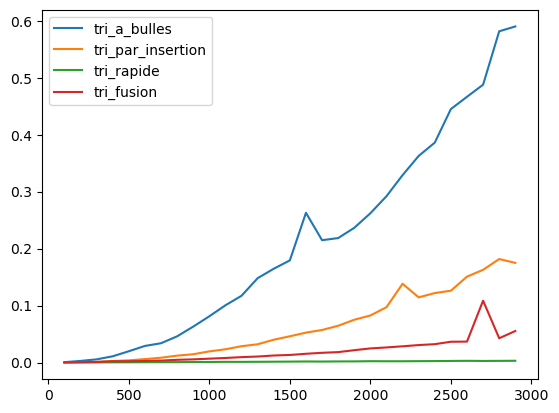

In [11]:
from matplotlib import pyplot as plt
from time import time

min= 100
# max = 500
max = 3000
pas = 100
X = [x for x in range(min,max,pas)]
Y=[]
tableau_1 =[]
print('Début tri_a_bulles')
for i in range (min, max,pas):
    for j in range(i):
        tableau_1.append(random.randint(0, max)) 
    start = time()
    tableau_1 = tri_a_bulles(tableau_1)
    stop = time()
    Y.append(stop - start)
    tableau_1.clear()
    
plt.plot(X,Y,label='tri_a_bulles')

Y.clear()
print('Début tri_par_insertion')
for i in range (min, max,pas):
    for j in range(i):
        tableau_1.append(random.randint(0, max)) 
    start = time()
    tableau_1 = tri_par_insertion(tableau_1)
    stop = time()
    Y.append(stop - start)
    tableau_1.clear()
    
plt.plot(X,Y,label='tri_par_insertion')


Y.clear()
print('Début tri_rapide')
for i in range (min, max,pas):
    for j in range(i):
        tableau_1.append(random.randint(0, max)) 
    start = time()
    tri_rapide(tableau_1,0,len(tableau_1)-1)
    stop = time()
    Y.append(stop - start)
    tableau_1.clear()
    
plt.plot(X,Y,label='tri_rapide')


Y.clear()
print('Début tri_fusion')
for i in range (min, max,pas):
    for j in range(i):
        tableau_1.append(random.randint(0, max)) 
    start = time()
    tableau_1 = tri_fusion(tableau_1)
    stop = time()
    Y.append(stop - start)
    tableau_1.clear()
    
plt.plot(X,Y,label='tri_fusion')

plt.legend()
plt.show()

In [26]:
import random
from time import time

def recherche_entier(tableau_trie, n):
    # print(tableau_trie,n)
    i = 0
    while(tableau_trie[i]<n):
        i+=1
    if tableau_trie[i] == n:
        return i
    else:
        return -1
    

def recherche_dichotomique(tab, n):
    print(tab, n)
    milieu = 0
    gauche = 0
    droite = len(tab)-1
    while(gauche < droite or milieu != len(tab)-1):
        milieu = int((gauche + droite)/2)
        # print('milieu',milieu)
        if n < tab[milieu]:
            droite = milieu -1
        elif n > tab[milieu]:
            gauche = milieu + 1
    if gauche > droite:
        milieu = len(tab)-1
    return milieu


def recherche_dichotomique_(tab, n):
    # print(tab, n)
    milieu = 0
    gauche = 0
    droite = len(tab)-1
    while tab[milieu] != n and gauche<droite:
        milieu = int((gauche + droite)/2)
        if n < tab[milieu]:
            droite = milieu -1
        elif n > tab[milieu]:
            gauche = milieu + 1
        # print('milieu',milieu, "gauche",gauche,"droite",droite)
    if tab[milieu] == n:
        # print('milieu',milieu, '=>',tab[milieu])
        return milieu
    # print(n, 'non trouvé')
    return -1



max = 20000
tableau_1 =[]
tableau_1.clear()
print('tri rapide début')
for j in range(max):    
    tableau_1.append(random.randint(0, max)) 
tri_rapide(tableau_1,0,len(tableau_1)-1)
print('tri rapide terminé')
start = time()
for j in range(10):
    n = random.randint(0, max-1)
    recherche_entier(tableau_1, n)
stop = time()
print(stop - start ,"ms")

start = time()
for j in range(10):
    n = random.randint(0, max)
    recherche_dichotomique_(tableau_1, n)
stop = time()
print(stop - start ,"ms")
    
    

tri rapide début
tri rapide terminé
0.0055425167083740234 ms
0.00010800361633300781 ms
